## Decision Tree Model
USA World Series Results,
Run on "Diff" data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import Data - only want USA matches
df = pd.read_csv('../data/output/final_diffs_all.csv')
df.head()

,Opp,Tournament,Poss_Time_Diff,Score_Diff,Conv_Diff,Tries_Diff,Passes_Diff,Contestable_KO_Win_pct_Diff,PenFK_Against_Diff,RuckMaul_Diff,Ruck_Win_pct_Diff,Cards_diff,Lineout_Win_Pct_Diff,Scrum_Win_Pct_Diff
0,AUSTRALIA,2015_Cape_Town,13.966480,-10.638298,-14.285714,0.250000,25.925926,-50.000000,0.000000,0.000000,0.083333,50.0,0.333333,1.0
1,WALES,2015_Cape_Town,7.471264,15.555556,14.285714,0.083333,27.868852,25.000000,-20.000000,-100.000000,0.250000,0.0,-1.000000,0.0
2,KENYA,2015_Cape_Town,-33.136095,-44.444444,-33.333333,-0.750000,-10.638298,-16.666667,66.666667,60.000000,-0.550000,0.0,-1.000000,0.0
3,NEW ZEALAND,2015_Cape_Town,51.758794,33.333333,33.333333,0.000000,76.119403,-75.000000,-50.000000,-100.000000,0.250000,0.0,0.000000,-1.0
4,FIJI,2015_Cape_Town,12.880562,-20.833333,-25.000000,0.266667,38.461538,-66.666667,-33.333333,-33.333333,0.208333,0.0,-1.000000,0.0


In [3]:
# Replace NaN's with zero
df.fillna(value=0, inplace=True)

In [4]:
# create result: win = 1, loss = 0
# if 'Score_Diff' is > 0 = win, if < 0, else tie
def createResult(x):
    if x > 0:
        return 1
    elif x < 0:
        return 0
    elif x == 0:
        return 2

df.loc[:,'Result'] = df.loc[:,'Score_Diff'].apply(createResult)

In [5]:
from sklearn.model_selection import train_test_split

In [15]:
#Drop features that are unneccessary/str or will bias the prediction
rf_data = df.drop((['Opp', 'Score_Diff', 'Tries_Diff','Tournament', 'Conv_Diff']), axis=1)

#Drop rows with Result == "2" (Ties). This label messes up classification models
rf_data.drop(rf_data[rf_data.Result == 2].index, inplace=True)

#Pull out the variable we're trying to predict: 'Result'
X = rf_data.drop('Result',axis=1)
y = rf_data['Result']

In [16]:
rf_data.head()

,Poss_Time_Diff,Passes_Diff,Contestable_KO_Win_pct_Diff,PenFK_Against_Diff,RuckMaul_Diff,Ruck_Win_pct_Diff,Cards_diff,Lineout_Win_Pct_Diff,Scrum_Win_Pct_Diff,Result
0,13.966480,25.925926,-50.000000,0.000000,0.000000,0.083333,50.0,0.333333,1.0,0
1,7.471264,27.868852,25.000000,-20.000000,-100.000000,0.250000,0.0,-1.000000,0.0,1
2,-33.136095,-10.638298,-16.666667,66.666667,60.000000,-0.550000,0.0,-1.000000,0.0,0
3,51.758794,76.119403,-75.000000,-50.000000,-100.000000,0.250000,0.0,0.000000,-1.0,1
4,12.880562,38.461538,-66.666667,-33.333333,-33.333333,0.208333,0.0,-1.000000,0.0,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Tree

In [18]:
#y_test

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtree = DecisionTreeClassifier()

In [21]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
predictions = dtree.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [24]:
#get the model's accuracy score
accuracy_score(y_test, predictions)

0.5510204081632653

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.48      0.57      0.52        21
           1       0.62      0.54      0.58        28

   micro avg       0.55      0.55      0.55        49
   macro avg       0.55      0.55      0.55        49
weighted avg       0.56      0.55      0.55        49



In [26]:
print(confusion_matrix(y_test,predictions))

[[12  9]
 [13 15]]


## Tree Visualization

In [27]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(rf_data.columns[0:-1])
features

['Poss_Time_Diff',
 'Passes_Diff',
 'Contestable_KO_Win_pct_Diff',
 'PenFK_Against_Diff',
 'RuckMaul_Diff',
 'Ruck_Win_pct_Diff',
 'Cards_diff',
 'Lineout_Win_Pct_Diff',
 'Scrum_Win_Pct_Diff']

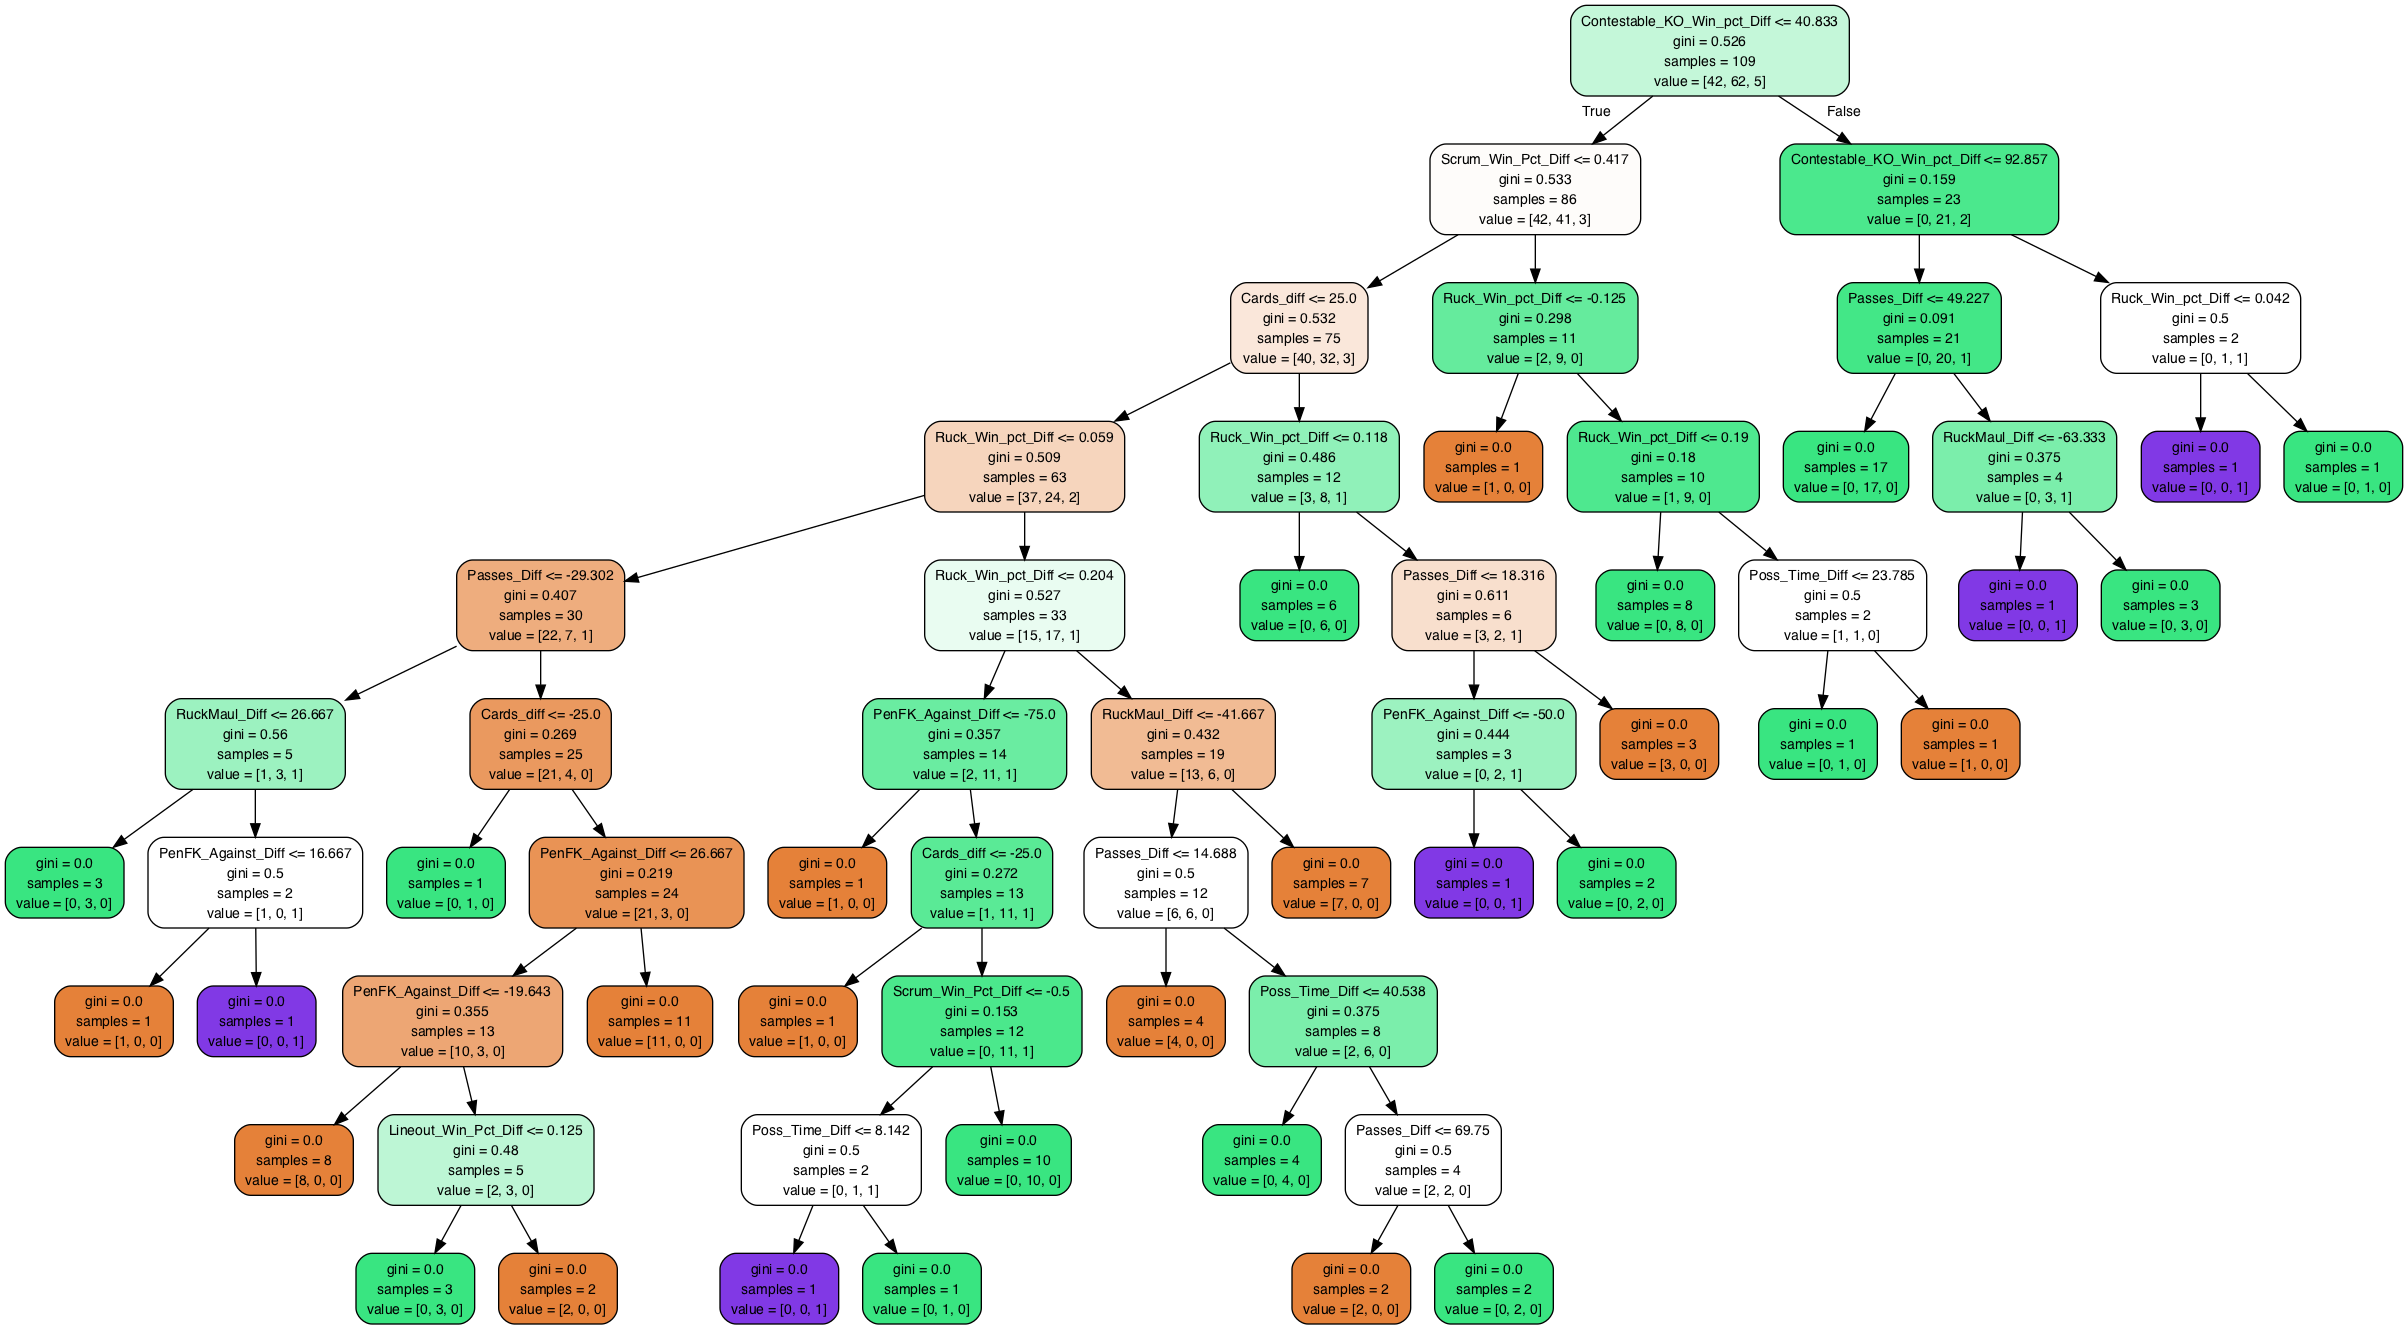

In [110]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

## Random Forest

In [145]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, verbose=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [114]:
rfc_pred = rfc.predict(X_test)

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [115]:
print(confusion_matrix(y_test,rfc_pred))

[[12 12]
 [ 6 17]]


In [116]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.67      0.50      0.57        24
          1       0.59      0.74      0.65        23

avg / total       0.63      0.62      0.61        47



In [117]:
rfc.score(X_test, y_test)

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


0.61702127659574468

In [118]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [120]:
feature_importances

,importance
Contestable_KO_Win_pct_Diff,0.187511
Passes_Diff,0.153693
Poss_Time_Diff,0.151377
Ruck_Win_pct_Diff,0.147430
PenFK_Against_Diff,0.102869
RuckMaul_Diff,0.080584
Scrum_Win_Pct_Diff,0.070475
Lineout_Win_Pct_Diff,0.066320
Cards_diff,0.039742


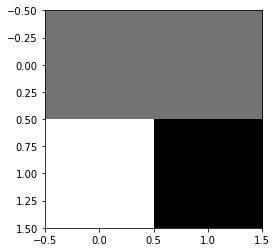

In [125]:
#import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,rfc_pred)
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()